# **Detecting Correctly Working Lasers**

---
Mohammad Yakub, 
Matriculation No: 808867

### **Problem Setting**

For the purpose of quality assurance, a manufacturer of medical lasers wants to introduce
a system which recognizes defective products. For the lasers produced, a constant light
output with a frequency as constant as possible is desired. Certain fluctuations are acceptable; Lasers in which the power fluctuates to an intolerable extent should be sorted out.
For this purpose, the intensity of each laser is measured for one minute - one measurement
per second.

### **Objective**

Our main aim is to classify faulty and non-faulty lasers correctly by implementing different classification models and compare between them to see which yield best result.

### **Summary of this project**

**1.Loading Libraries**

**2.Loading Data**

**3.Data Analysis**

* Check the dataset keys

* Insight into the data 

* Labels Count

* Checking missing values

* Checking for distribution of features (Histogram)

* Checking Correlations

**4.Data splitting**

* Train-Test split

**5.Model Building and Evaluation**

* Algorithms

    * Logistic Regression

    * SVM (Support Vector Machine)
    
    * Decision Tree
    
    * Random Forest
    
* Train model using default parameters
    
* Evaluation
   * Applying trained model on test dataset
   * Generating confusion matrix, classification report, and ROC curve
   * Applying Cross-validation (K-Fold) to validate the model
   
* Hyperparameter Tuning
   * Applying Grid-Search for finding best parameters
   * Train model using best parameters
   * Generating confusion matrix, classification report, and ROC curve
     
**6.Conclusion**

### **Loading the Necessary Libraries**

In [3]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

### **Data Loading**

In [5]:
from scipy.io import loadmat
laser_mat = loadmat('laser.mat')

### **Data Analysis**

**Check the dataset keys**

In [6]:
laser_mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Y'])

**Insight into the data**

In [7]:
laser_mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Tue Dec 07 12:35:22 2010',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[29.8509 , 25.7777 , 28.8859 , ...,  9.65777,  5.58567,  9.82632],
        [26.2727 , 31.2289 , 29.7408 , ...,  5.36246,  6.94501,  7.90108],
        [34.179  , 27.0398 , 29.3324 , ..., 14.4956 , 16.8671 , 18.7888 ],
        ...,
        [35.8083 , 31.0808 , 24.7077 , ..., 16.7864 ,  7.77301, 12.6472 ],
        [33.9818 , 27.2921 , 23.285  , ...,  5.35315,  6.88335, -2.805  ],
        [33.3759 , 25.4986 , 31.0451 , ..., 22.5099 , 19.8174 , 20.6888 ]]),
 'Y': array([[-1],
        [ 1],
        [-1],
        [ 1],
        [ 1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [-

In [8]:
data = laser_mat['X']
data

array([[29.8509 , 25.7777 , 28.8859 , ...,  9.65777,  5.58567,  9.82632],
       [26.2727 , 31.2289 , 29.7408 , ...,  5.36246,  6.94501,  7.90108],
       [34.179  , 27.0398 , 29.3324 , ..., 14.4956 , 16.8671 , 18.7888 ],
       ...,
       [35.8083 , 31.0808 , 24.7077 , ..., 16.7864 ,  7.77301, 12.6472 ],
       [33.9818 , 27.2921 , 23.285  , ...,  5.35315,  6.88335, -2.805  ],
       [33.3759 , 25.4986 , 31.0451 , ..., 22.5099 , 19.8174 , 20.6888 ]])

In [9]:
label = laser_mat['Y']
label

array([[-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],

**No of Rows**

In [10]:
len(data)

200

**No of Cols or Features**

In [11]:
len(data[0])

60

**Labels Count**

Text(0.5, 1.0, 'count of the labels')

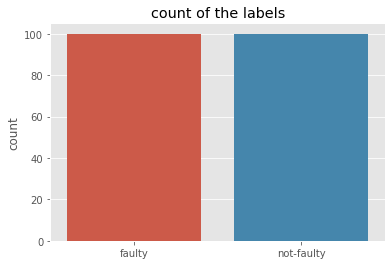

In [231]:
plt.style.use('ggplot')
name = ["faulty" if x==-1 else "not-faulty" for x in label]
plt.subplots(figsize = (6,4))
sns.countplot(name)
plt.title("count of the labels")

**Checking missing values**

the number of missing values are 0


<AxesSubplot:title={'center':'Missing values in each dimension'}>

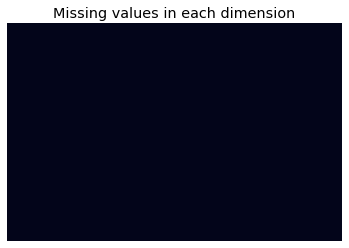

In [232]:
missing = np.isnan(data)
fig, ax = plt.subplots(figsize = (6,4))
print("the number of missing values are", np.sum(missing))
plt.title("Missing values in each dimension")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
sns.heatmap(missing, cbar= False)

**Checking for distribution of features (Histogram)**

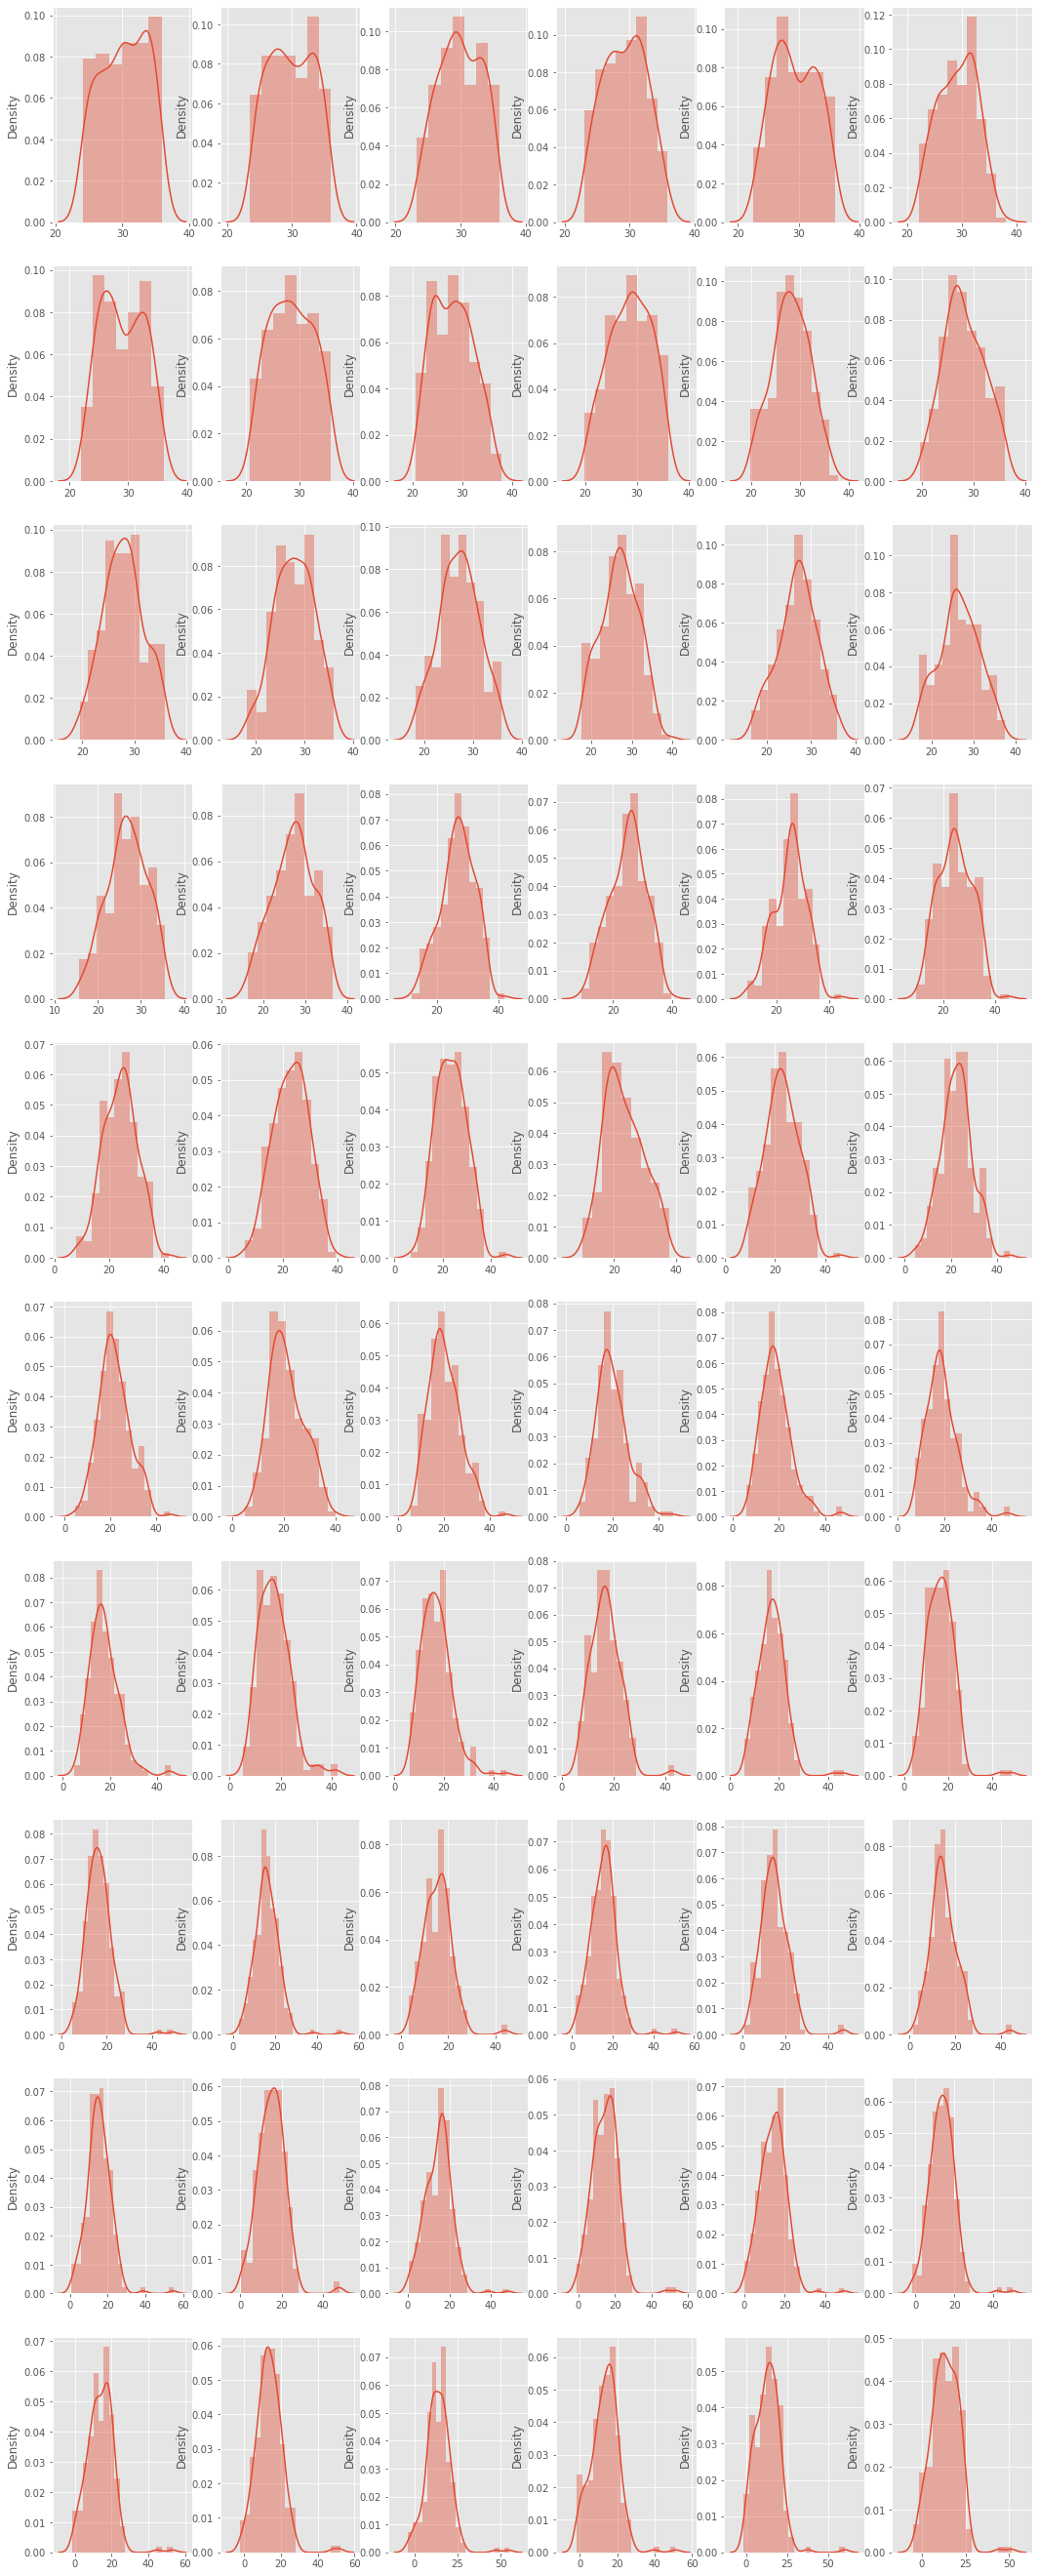

In [233]:
fig, ax = plt.subplots(10,6, figsize = (18,48))
ax = ax.reshape(-1)
for i in range(len(data[0])):
    sns.distplot(data[:,i],  ax = ax[i])

Observation:
    From the Histogram, we can make quite good approximation that our attributes distribution is Gaussian (bell shape curve) with very few outliers.

**Checking Correlations**

<AxesSubplot:>

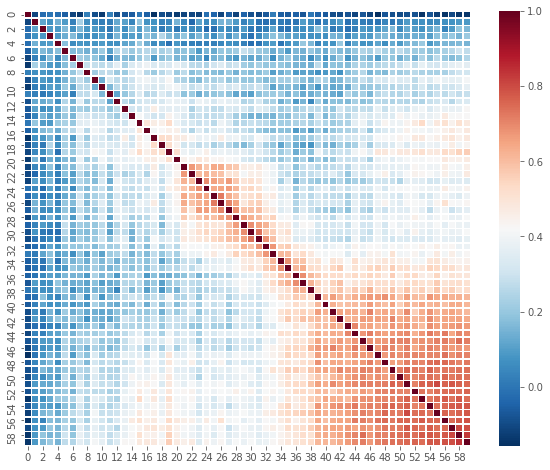

In [234]:
df_datas = pd.DataFrame(data)
plt.figure(figsize= (10,8))
sns.heatmap(df_datas.corr(),cmap='RdBu_r',linewidth=0.5)

Observation: As we can see that features are not highly correleated with each other. So, it is not necessary to drop any.

### **Data Splitting: (Train-Test split)**

In [12]:
#Split data into 70% training & 30% testing data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.3, random_state = 42)

### **Model Building:**

### **Logistic Regression**

In [236]:
pred_Log_Reg_model = LogisticRegression()
pred_Log_Reg_model.fit(X_train, y_train)

LogisticRegression()

**Train Data Evaluation: (Logistic Regression Model)**

In [237]:
#Evaluate the Logistic Regression model on the train data set
print(f"Accuracy of Logistic Regression Model on training dataset {pred_Log_Reg_model.score(X_train, y_train)}")
plot_confusion_matrix(pred_Log_Reg_model,
                      X_train,
                      y_train,
                      display_labels=['Faulty','Not-Faulty']
                     )
plt.grid(False)
plt.show()
y_pred = pred_Log_Reg_model.predict(X_train)
print(classification_report(y_train, y_pred))

Accuracy of Logistic Regression Model on training dataset 1.0


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        68

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



**Test Data Evaluation: (Logistic Regression Model)**

Accuracy of Logistic Regression Model on Test Dataset 0.9


              precision    recall  f1-score   support

          -1       0.87      0.93      0.90        28
           1       0.93      0.88      0.90        32

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



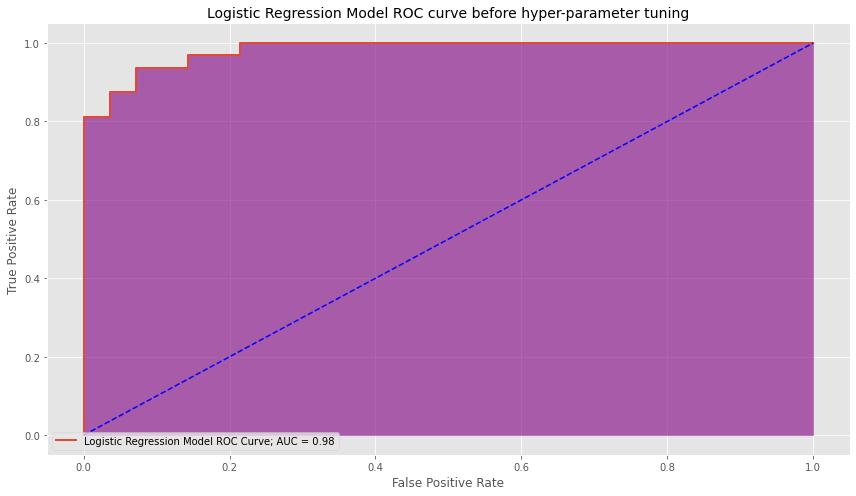

In [238]:
print(f"Accuracy of Logistic Regression Model on Test Dataset {pred_Log_Reg_model.score(X_test, y_test)}")
plot_confusion_matrix(pred_Log_Reg_model,
                      X_test,
                      y_test,
                      display_labels=['Faulty','Not-Faulty']
                     )
plt.grid(False)
plt.show()
y_pred = pred_Log_Reg_model.predict(X_test)
print(classification_report(y_test, y_pred))

# plot ROC curve and AUC.
y_pred_proba = pred_Log_Reg_model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:,1])
auc_rf = auc(fpr, tpr)
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.fill_between(fpr, tpr, 0, color='purple', alpha=0.6)
ax1 = plt.plot(fpr, tpr, linewidth=2,label='Logistic Regression Model ROC Curve; AUC = %0.2f' % auc_rf)
random_probs = [1 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.legend(loc='lower left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Model ROC curve before hyper-parameter tuning', size=14)
fig.tight_layout()

**Cross-Validation (Logistic Regression model)**

In [239]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model
scoresLR = cross_val_score(pred_Log_Reg_model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy Logistic Regression model: %.3f' % (np.mean(scoresLR)))

Accuracy Logistic Regression model: 0.883


**Hyper-parameter tuning for Logistic Regression model using GridSearchCV**

In [240]:
parameters = [{"C":[0.01, 0.05, 0.1 , 0.5, 0.8, 1, 1.2]}]
grid_search = GridSearchCV(estimator = pred_Log_Reg_model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [241]:
print("Best Score using Grid Search:",grid_search.best_score_)
print("Best Parameters using Grid Search:", grid_search.best_params_)

Best Score using Grid Search: 0.9642857142857142
Best Parameters using Grid Search: {'C': 0.01}


**Set the best parameters**

In [242]:
pred_Log_Reg_model_tune = grid_search.best_estimator_
pred_Log_Reg_model_tune.fit(X_train, y_train)

LogisticRegression(C=0.01)

**Test Data Evaluation after Hyper parameter tuning (Logistic Regression Model)**

Accuracy of Logistic Regression Model on Test Dataset after parameter tuning 0.95


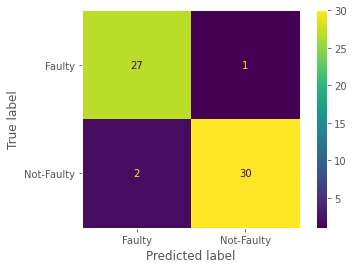

              precision    recall  f1-score   support

          -1       0.93      0.96      0.95        28
           1       0.97      0.94      0.95        32

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [243]:
print(f"Accuracy of Logistic Regression Model on Test Dataset after parameter tuning {pred_Log_Reg_model_tune.score(X_test, y_test)}")
plot_confusion_matrix(pred_Log_Reg_model_tune,
                      X_test,
                      y_test,
                      display_labels=['Faulty','Not-Faulty']
                     )
plt.grid(False)
plt.show()
y_pred = pred_Log_Reg_model_tune.predict(X_test)
print(classification_report(y_test, y_pred))

# plot ROC curve and AUC.
y_pred_proba = pred_Log_Reg_model_tune.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:,1])
auc_rf = auc(fpr, tpr)
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.fill_between(fpr, tpr, 0, color='purple', alpha=0.6)
ax1 = plt.plot(fpr, tpr, linewidth=2,label='Logistic Regression Model ROC Curve; AUC = %0.2f' % auc_rf)
random_probs = [1 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.legend(loc='lower left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Model ROC curve after hyper-parameter tuning', size=14)
fig.tight_layout()

### **SVM (Support Vector Machine)**

In [244]:
pred_SVC_model = SVC(probability=True)
pred_SVC_model.fit(X_train, y_train)

SVC(probability=True)

**Train Data Evaluation: (Support Vector Classifier Model)**

Accuracy of SVM on training dataset 0.9857142857142858


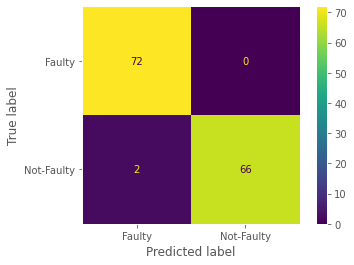

              precision    recall  f1-score   support

          -1       0.97      1.00      0.99        72
           1       1.00      0.97      0.99        68

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140



In [245]:
#Evaluate the LinearSVCmodel on the train data set
print(f"Accuracy of SVM on training dataset {pred_SVC_model.score(X_train, y_train)}")
plot_confusion_matrix(pred_SVC_model,
                      X_train,
                      y_train,
                      display_labels=['Faulty','Not-Faulty']
                     )
plt.grid(False)
plt.show()
y_pred = pred_SVC_model.predict(X_train)
print(classification_report(y_train, y_pred))

**Test Data Evaluation: (Support Vector Classifier Model)**

accuracy of SVM on Test Dataset 0.9833333333333333


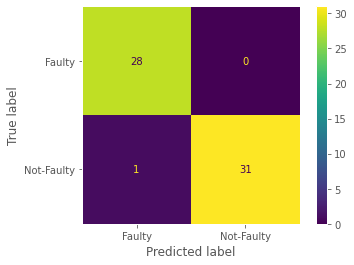

              precision    recall  f1-score   support

          -1       0.97      1.00      0.98        28
           1       1.00      0.97      0.98        32

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



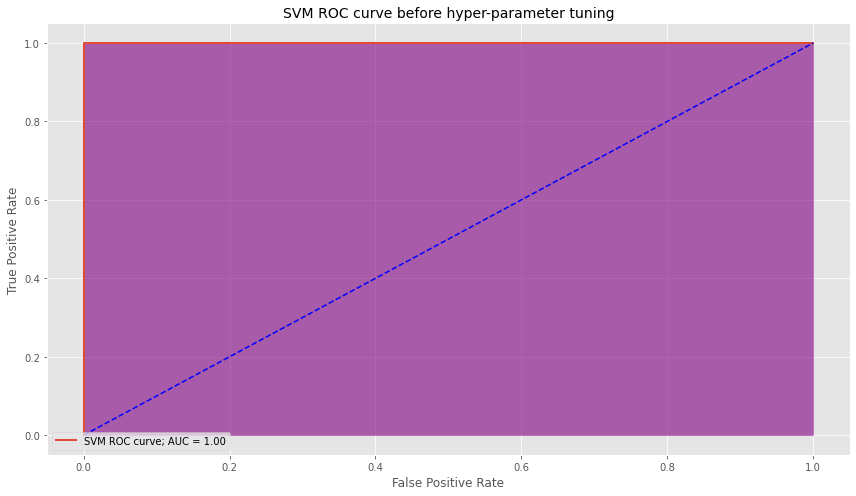

In [246]:
print(f"accuracy of SVM on Test Dataset {pred_SVC_model.score(X_test, y_test)}")
plot_confusion_matrix(pred_SVC_model,
                      X_test,
                      y_test,
                      display_labels=['Faulty','Not-Faulty']
                     )
plt.grid(False)
plt.show()
y_pred = pred_SVC_model.predict(X_test)
print(classification_report(y_test, y_pred))

# plot ROC curve and AUC.
y_pred_proba = pred_SVC_model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:,1])
auc_rf = auc(fpr, tpr)
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.fill_between(fpr, tpr, 0, color='purple', alpha=0.6)
ax1 = plt.plot(fpr, tpr, linewidth=2,label='SVM ROC curve; AUC = %0.2f' % auc_rf)
random_probs = [1 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.legend(loc='lower left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC curve before hyper-parameter tuning', size=14)
fig.tight_layout()

**Cross-Validation (SVM)**

In [247]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model
scoresSVC = cross_val_score(pred_SVC_model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy SVC: %.3f' % (np.mean(scoresSVC)))

Accuracy SVC: 0.917


**Hyper-parameter tuning for SVM using GridSearchCV**

In [316]:
parameters = [{'C': [0.1, 0.5, 0.7, 1, 1.5], 'kernel': ['linear']},
              {'C': [0.1, 0.5, 0.7, 1, 1.5], 'kernel': ['rbf','poly'], 'gamma': [0.01, 0.05, 0.1, 0.5]}]
grid_search = GridSearchCV(estimator = pred_SVC_model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [317]:
print("Best Score using Grid Search:",grid_search.best_score_)
print("Best Parameters using Grid Search:", grid_search.best_params_)

Best Score using Grid Search: 0.9571428571428571
Best Parameters using Grid Search: {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}


**Set the best parameters**

In [320]:
pred_SVC_model_tune = SVC(C=grid_search.best_params_['C'],kernel = grid_search.best_params_['kernel'],gamma= grid_search.best_params_['gamma'],probability=True)
pred_SVC_model_tune.fit(X_train, y_train)

SVC(C=0.1, gamma=0.01, kernel='poly', probability=True)

**Test Data Evaluation after Hyper parameter tuning: (Support Vector Classifier Model)**

accuracy of SVM on Test Dataset after parameter tuning 0.9833333333333333


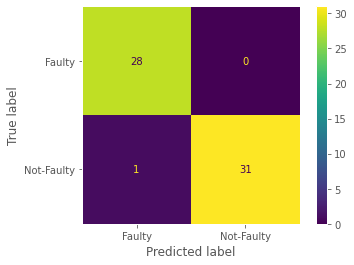

              precision    recall  f1-score   support

          -1       0.97      1.00      0.98        28
           1       1.00      0.97      0.98        32

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [322]:
print(f"accuracy of SVM on Test Dataset after parameter tuning {pred_SVC_model_tune.score(X_test, y_test)}")
plot_confusion_matrix(pred_SVC_model_tune,
                      X_test,
                      y_test,
                      display_labels=['Faulty','Not-Faulty']
                     )
plt.grid(False)
plt.show()
y_pred = pred_SVC_model_tune.predict(X_test)
print(classification_report(y_test, y_pred))

# plot ROC curve and AUC.
y_pred_proba = pred_SVC_model_tune.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:,1])
auc_rf = auc(fpr, tpr)
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.fill_between(fpr, tpr, 0, color='purple', alpha=0.6)
ax1 = plt.plot(fpr, tpr, linewidth=2,label='SVM ROC curve; AUC = %0.2f' % auc_rf)
random_probs = [1 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.legend(loc='lower left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC curve after hyper-parameter tuning', size=14)
fig.tight_layout()

### **Decision Tree Classifier**

In [14]:
pred_Decision_Tree_model=DecisionTreeClassifier()
pred_Decision_Tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

**Train Data Evaluation: (Decision Tree Classifier)**

Accuracy of Decision Tree Model on training dataset 1.0


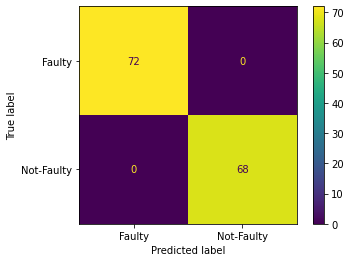

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        68

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [15]:
#Evaluate the Decision Tree model on the train data set
print(f"Accuracy of Decision Tree Model on training dataset {pred_Decision_Tree_model.score(X_train, y_train)}")
plot_confusion_matrix(pred_Decision_Tree_model,
                      X_train,
                      y_train,
                      display_labels=['Faulty','Not-Faulty']
                     )
plt.grid(False)
plt.show()
y_pred = pred_Decision_Tree_model.predict(X_train)
print(classification_report(y_train, y_pred))

**Test Data Evaluation: (Decision Tree Model)**

Accuracy of Decision Tree Model on Test Dataset 0.9166666666666666


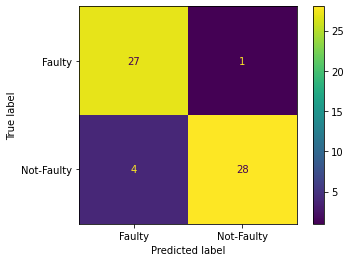

              precision    recall  f1-score   support

          -1       0.87      0.96      0.92        28
           1       0.97      0.88      0.92        32

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



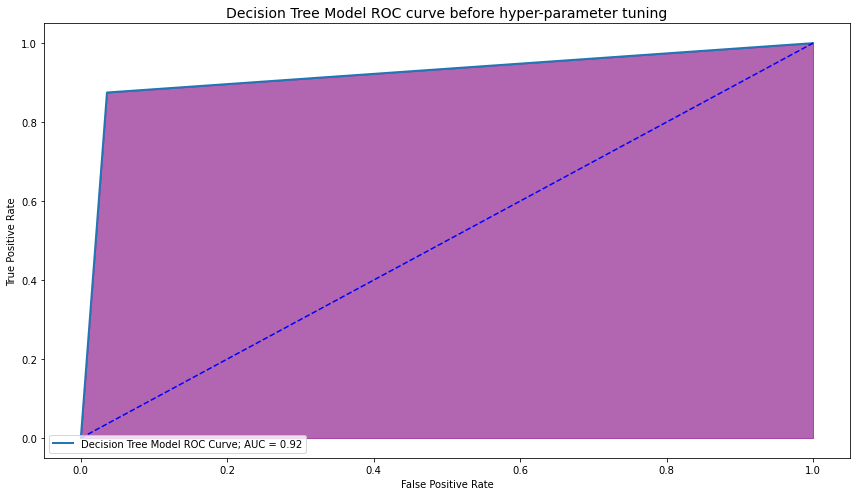

In [16]:
print(f"Accuracy of Decision Tree Model on Test Dataset {pred_Decision_Tree_model.score(X_test, y_test)}")
plot_confusion_matrix(pred_Decision_Tree_model,
                      X_test,
                      y_test,
                      display_labels=['Faulty','Not-Faulty']
                     )
plt.grid(False)
plt.show()
y_pred = pred_Decision_Tree_model.predict(X_test)
print(classification_report(y_test, y_pred))

# plot ROC curve and AUC.
y_pred_proba = pred_Decision_Tree_model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:,1])
auc_rf = auc(fpr, tpr)
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.fill_between(fpr, tpr, 0, color='purple', alpha=0.6)
ax1 = plt.plot(fpr, tpr, linewidth=2,label='Decision Tree Model ROC Curve; AUC = %0.2f' % auc_rf)
random_probs = [1 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.legend(loc='lower left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Model ROC curve before hyper-parameter tuning', size=14)
fig.tight_layout()

**Cross-Validation (Decision Tree Model)**

In [17]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model
scoresDCT = cross_val_score(pred_Decision_Tree_model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy Decision Tree model: %.3f' % (np.mean(scoresDCT)))

Accuracy Decision Tree model: 0.767


**Hyper-parameter tuning for Decision Tree model using GridSearchCV**

In [18]:
parameters={'criterion':['gini','entropy'], "max_depth":[10, 20, 30, 40, 50]}
grid_search = GridSearchCV(estimator = pred_Decision_Tree_model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [19]:
print("Best Score using Grid Search:",grid_search.best_score_)
print("Best Parameters using Grid Search:", grid_search.best_params_)

Best Score using Grid Search: 0.8857142857142858
Best Parameters using Grid Search: {'criterion': 'entropy', 'max_depth': 30}


**Set the best parameters**

In [20]:
pred_Decision_Tree_model_tune = grid_search.best_estimator_
pred_Decision_Tree_model_tune.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30)

**Test Data Evaluation after Hyper parameter tuning (Decision Tree Model)**

Accuracy of Decision Tree Model on Test Dataset 0.9333333333333333


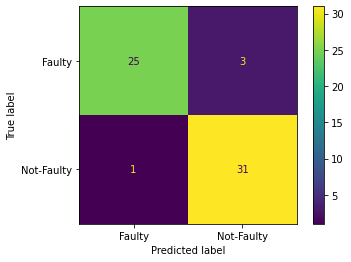

              precision    recall  f1-score   support

          -1       0.96      0.89      0.93        28
           1       0.91      0.97      0.94        32

    accuracy                           0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



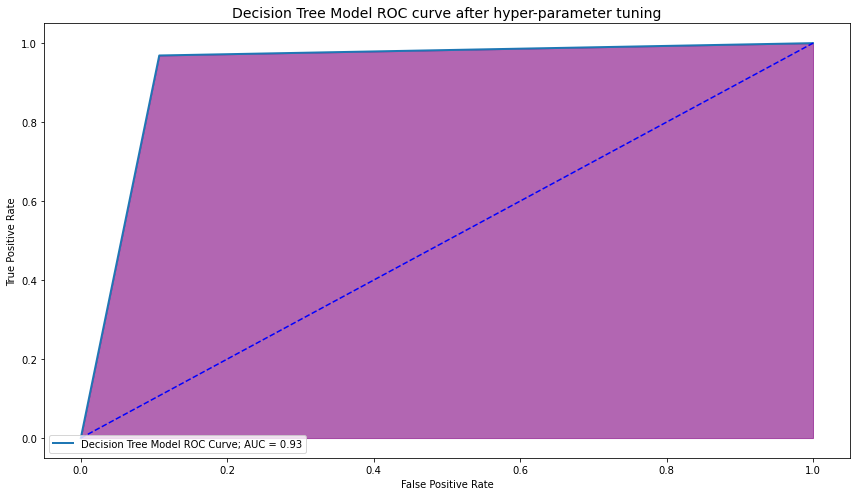

In [21]:
print(f"Accuracy of Decision Tree Model on Test Dataset {pred_Decision_Tree_model_tune.score(X_test, y_test)}")
plot_confusion_matrix(pred_Decision_Tree_model_tune,
                      X_test,
                      y_test,
                      display_labels=['Faulty','Not-Faulty']
                     )
plt.grid(False)
plt.show()
y_pred = pred_Decision_Tree_model_tune.predict(X_test)
print(classification_report(y_test, y_pred))

# plot ROC curve and AUC.
y_pred_proba = pred_Decision_Tree_model_tune.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:,1])
auc_rf = auc(fpr, tpr)
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.fill_between(fpr, tpr, 0, color='purple', alpha=0.6)
ax1 = plt.plot(fpr, tpr, linewidth=2,label='Decision Tree Model ROC Curve; AUC = %0.2f' % auc_rf)
random_probs = [1 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.legend(loc='lower left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Model ROC curve after hyper-parameter tuning', size=14)
fig.tight_layout()

### **Random Forest**

In [44]:
pred_RF_model = RandomForestClassifier()
pred_RF_model.fit(X_train,y_train)

RandomForestClassifier()

**Train Data Evaluation (Random Forest Model)**

Accuracy of Random Forest model on training dataset 1.0


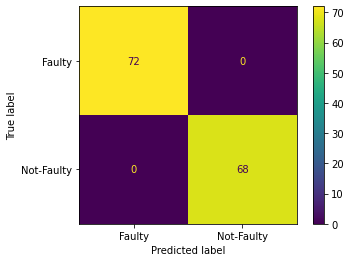

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        68

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [45]:
#Evaluate the Random Forest model on the train data set
print(f"Accuracy of Random Forest model on training dataset {pred_RF_model.score(X_train, y_train)}")
plot_confusion_matrix(pred_RF_model,
                      X_train,
                      y_train,
                      display_labels=['Faulty','Not-Faulty']
                     )
plt.grid(False)
plt.show()
y_pred = pred_RF_model.predict(X_train)
print(classification_report(y_train, y_pred))

**Test Data Evaluation (Random Forest Model)**

Accuracy of Random Forest model on Test Dataset 0.9666666666666667


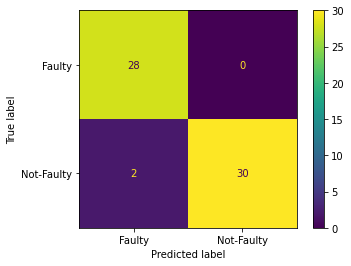

              precision    recall  f1-score   support

          -1       0.93      1.00      0.97        28
           1       1.00      0.94      0.97        32

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



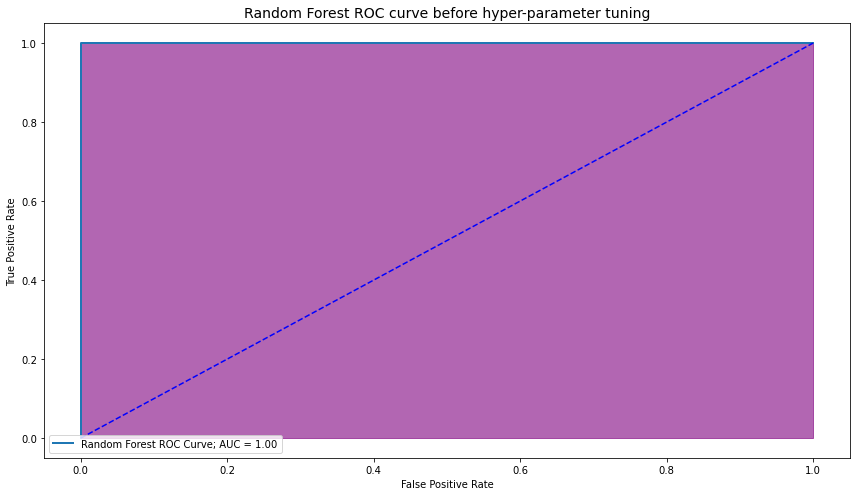

In [46]:
print(f"Accuracy of Random Forest model on Test Dataset {pred_RF_model.score(X_test, y_test)}")
plot_confusion_matrix(pred_RF_model,
                      X_test,
                      y_test,
                      display_labels=['Faulty','Not-Faulty']
                     )
plt.grid(False)
plt.show()
y_pred = pred_RF_model.predict(X_test)
print(classification_report(y_test, y_pred))

# plot ROC curve and AUC.
y_pred_proba = pred_RF_model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:,1])
auc_rf = auc(fpr, tpr)
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.fill_between(fpr, tpr, 0, color='purple', alpha=0.6)
ax1 = plt.plot(fpr, tpr, linewidth=2,label='Random Forest ROC Curve; AUC = %0.2f' % auc_rf)
random_probs = [1 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.legend(loc='lower left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve before hyper-parameter tuning', size=14)
fig.tight_layout()

**Cross-Validation (Random Forest Model)**

In [48]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model
scoresRFC = cross_val_score(pred_RF_model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy RFC: %.3f' % (np.mean(scoresRFC)))

Accuracy RFC: 0.933


**Hyper-parameter tuning for Random Forest Model using GridSearchCV**

In [49]:
n_estimators = [50,100,150,200,250]
max_depth= [20,30,40,50,60]

parameters = {'criterion':['gini','entropy'], 'n_estimators': n_estimators,
              'max_depth': max_depth}
    
grid_search = GridSearchCV(estimator = pred_RF_model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [50]:
print("Best Score using Grid Search:",grid_search.best_score_)
print("Best Parameters using Grid Search:", grid_search.best_params_)

Best Score using Grid Search: 0.9642857142857144
Best Parameters using Grid Search: {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 50}


**Set the best parameters**

In [51]:
pred_RF_model_tune =grid_search.best_estimator_
pred_RF_model_tune.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=50)

**Test Data Evaluation after Hyper parameter tuning: (Random Forest Model)**

Accuracy of Random Forest model on Test Dataset 0.9833333333333333


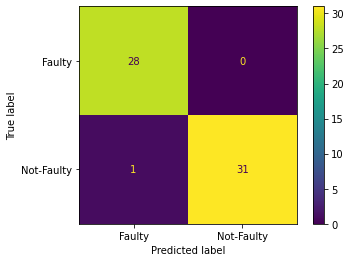

              precision    recall  f1-score   support

          -1       0.97      1.00      0.98        28
           1       1.00      0.97      0.98        32

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



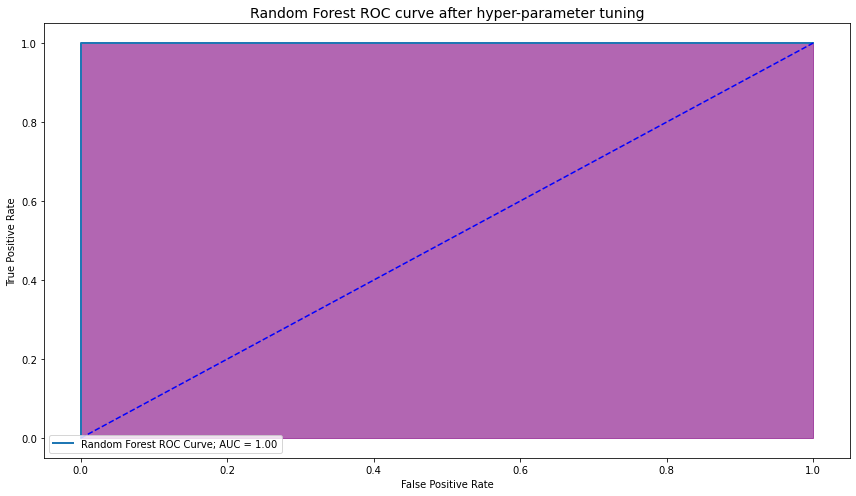

In [53]:
print(f"Accuracy of Random Forest model on Test Dataset {pred_RF_model_tune.score(X_test, y_test)}")
plot_confusion_matrix(pred_RF_model_tune,
                      X_test,
                      y_test,
                      display_labels=['Faulty','Not-Faulty']
                     )
plt.grid(False)
plt.show()
y_pred = pred_RF_model_tune.predict(X_test)
print(classification_report(y_test, y_pred))

# plot ROC curve and AUC.
y_pred_proba = pred_RF_model_tune.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:,1])
auc_rf = auc(fpr, tpr)
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.fill_between(fpr, tpr, 0, color='purple', alpha=0.6)
ax1 = plt.plot(fpr, tpr, linewidth=2,label='Random Forest ROC Curve; AUC = %0.2f' % auc_rf)
random_probs = [1 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.legend(loc='lower left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve after hyper-parameter tuning', size=14)
fig.tight_layout()

### **Conclusion**

We have used total four models for this problem setting, and we can see:
    
    * Accuracy after applying trained model on test data: 
        * Logistic Regression (90%)
        * Support Vector Machine (98%)
        * Decision Tree (92%)
        * Random Forest (97%)
        
    * Accuracy after applying K-Fold Cross Validation:
        * Logistic Regression (88%)
        * Support Vector Machine (92%)
        * Decision Tree (77%)
        * Random Forest (93%)
        
     * Accuracy after hyperparameter tuning:
        * Logistic Regression (95%)
        * Support Vector Machine (98%)
        * Decision Tree (93%)
        * Random Forest (98%)
        
We can observe that after K-Fold cross-validation accuracy of all models has been decreased, whereas all are increased after hyperparameter tuning with cross-validation. Among these four models, Support Vector Machine and Random Forest has been yielded best results. Thus, we can choose any one of them for this problem setting.